## TikTok Data Summary
A synthetic TikTok dataset containing video transciptions and comments on user claims. This content needs to be reviewed by moderators to determine if the content is a user claim on unverified information or instead offers an opinion on that information.

## Data Dictionary

| Column name              | Type   | Description                                                                                                                                                                                                                                                         |
|--------------------------|--------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| #                        | int    | TikTok assigned number for video with claim/opinion.                                                                                                                                                                                                                |
| claim_status             | obj    | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source. |
| video_id                 | int    | Random identifying number assigned to video upon publication on TikTok.                                                                                                                                                                                             |
| video_duration_sec       | int    | How long the published video is measured in seconds.                                                                                                                                                                                                                |
| video_transcription_text | obj    | Transcribed text of the words spoken in the published video.                                                                                                                                                                                                        |
| verified_status          | obj    | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”                                                                                                                                |
| author_ban_status        | obj    | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”                                                                                                                             |
| video_view_count         | float  | The total number of times the published video has been viewed.                                                                                                                                                                                                      |
| video_like_count         | float  | The total number of times the published video has been liked by other users.                                                                                                                                                                                        |
| video_share_count        | float  | The total number of times the published video has been shared by other users.                                                                                                                                                                                       |
| video_download_count     | float  | The total number of times the published video has been downloaded by other users.                                                                                                                                                                                   |
| video_comment_count      | float  | The total number of comments on the published video.                                                                                                                                                                                                                |

Source: https://www.coursera.org/learn/get-started-with-python/quiz/Ky5XE/activity-create-your-course-2-tiktok-project/attempt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("tiktok_dataset.csv")

# data.head(10)
# data.info()
# data.describe()

### Inspecting the Data
When inspecting the data we can make some initial observations. We have a lot of quantatative data regarding the video length, view counts, and engagement from users. The most diverse column of data is of course the video transcription text and is core in developing a machine learning model that can properly identify what is a user claim and what is a user opinion. In total there are **19382 rows** with many columns having **19084** `non-null` values. This means there are **298 rows** that will contain at least **1** `null` value in a column. Any arithemtic across data columns needs to be considered carefully as some numeric columns are `int` based datatypes and others are `float` based datatypes. Columns `#` and `video_id` should be considered/converted into an `object` dtype as their numerical reference are not values we will want to perform calculations on.

In [4]:
# Exploring how many unique claims versus opinions are available in this dataset. 
data['claim_status'].value_counts()

# Percentage of each claim status in the dataset
counts_and_percs = data['claim_status'].value_counts(normalize=False).to_frame(name='unique_count')
counts_and_percs['percentage'] = (data['claim_status'].value_counts(normalize=True) * 100).round(2)

counts_and_percs

,unique_count,percentage
claim_status,,
claim,9608,50.35
opinion,9476,49.65


In [5]:
# Claim Mean & Median
claim_mask = data['claim_status'] == 'claim'
df_claim_mask = data[claim_mask]
print("Mean view count for claims:", df_claim_mask['video_view_count'].mean().round(2))
print("Median view count for claims:", df_claim_mask['video_view_count'].median())

print("")

# Opinion Mean & Median
opinion_mask = data['claim_status'] == 'opinion'
df_opinion_mask = data[opinion_mask]
print("Mean view count for opinions:", df_opinion_mask['video_view_count'].mean().round(2))
print("Median view count for opinions:", df_opinion_mask['video_view_count'].median())

Mean view count for claims: 501029.45
Median view count for claims: 501555.0

Mean view count for opinions: 4956.43
Median view count for opinions: 4953.0


### Summary for Claim Status ('claim_status')

Initially, we see that there is a near even split with the **unique** counts for the two different claim statuses of `claim` and `opinion` in the `claim_status` column. Claims are representative at `50.35%` and opinions are at `49.65%`. We see similar balanced statistics with the mean and median of both claim statuses. We can conclude that neither status is represented in a lopsided way that would skew results later towards one or the other. This also means that we don't have to worry about outliers since the mean and median are roughly the same. However, while the unique values are evenly split we do see that mean view counts are drastically different. The mean view count for claims is about `501029` and the mean view count for opinions is about `4956`. There are **100x** more claims than opinions. 

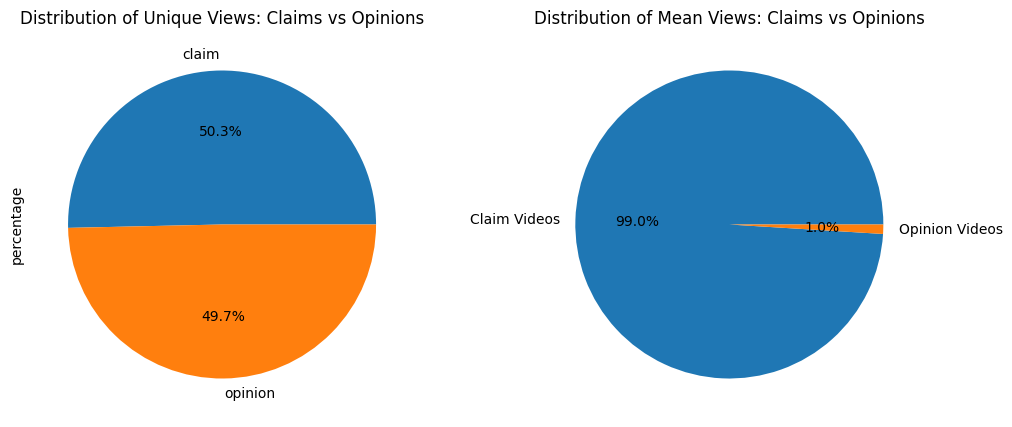

In [6]:
# Plot both charts side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Unique View Counts
counts_and_percs['percentage'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Distribution of Unique Views: Claims vs Opinions')

# Mean View Counts
mean_claim_views = df_claim_mask['video_view_count'].mean().round(2)
mean_opinion_views = df_opinion_mask['video_view_count'].mean().round(2)

mean_counts = pd.Series({
    'Claim Videos': mean_claim_views,
    'Opinion Videos': mean_opinion_views
})

mean_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Distribution of Mean Views: Claims vs Opinions')

plt.show()

### 'Claim Status' and 'Author Ban Status' Breakdown
Below, we can see a clearer breakdown of the ban statuses of the authors of the videos versus the claim status. We can see that there are many more `claim` videos with banned authors than there are `opinion` videos with banned authors. We can infer that `claim` videos are more closely scutinzed than `opinion` videos which would make sense since `claim` videos are intentionally meant to be presented as more factual than `opinion` videos are. We don't know the contents of the videos themselves (yet) so we do not know if this inference is strictly true as the bans could be for other bad actor actions. 

In [32]:
# Counts for each ban stuatus for each claim status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [50]:
# Mean and Median for Video Engagement 
data.groupby(["author_ban_status"]).agg(
    {
        'video_view_count': ['mean', 'median'],
        'video_like_count': ['mean', 'median'],
        'video_share_count': ['mean', 'median']
    }
).round(2)

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active                   215927.04    8616.0         71036.53    2222.0   
banned                   445845.44  448201.0        153017.24  105573.0   
under review             392204.84  365245.5        128718.05   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                     14111.47    437.0  
banned                     29998.94  14468.0  
under review               25774.70   9444.0